In [1]:
import urllib
import urllib.request
import datetime
import pandas as pd
import numpy as np
from pandas import read_csv  
import random as rd # generating random numbers
#from datetime import datetime
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [153]:
df_final = read_csv('nyc_mta_final.csv')

In [154]:
df_final.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,YEAR,MONTH,DAY,WEEKDAY,HOUR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2016,03:00:00,REGULAR,5980509,2025806,2016-12-24 03:00:00,2016,12,24,Saturday,3
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2016,07:00:00,REGULAR,5980531,2025818,2016-12-24 07:00:00,2016,12,24,Saturday,7
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2016,11:00:00,REGULAR,5980613,2025912,2016-12-24 11:00:00,2016,12,24,Saturday,11
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2016,15:00:00,REGULAR,5980899,2025965,2016-12-24 15:00:00,2016,12,24,Saturday,15
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2016,19:00:00,REGULAR,5981382,2026001,2016-12-24 19:00:00,2016,12,24,Saturday,19


In [155]:
df_final.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
DATETIME    object
YEAR         int64
MONTH        int64
DAY          int64
WEEKDAY     object
HOUR         int64
dtype: object

#### Busyness is defined as the sum of entries & exits 

In [156]:
df_final['TOTAL_COUNT'] = df_final['ENTRIES'] + df_final['EXITS']

In [157]:
df_final.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,YEAR,MONTH,DAY,WEEKDAY,HOUR,TOTAL_COUNT
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2016,03:00:00,REGULAR,5980509,2025806,2016-12-24 03:00:00,2016,12,24,Saturday,3,8006315
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2016,07:00:00,REGULAR,5980531,2025818,2016-12-24 07:00:00,2016,12,24,Saturday,7,8006349
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2016,11:00:00,REGULAR,5980613,2025912,2016-12-24 11:00:00,2016,12,24,Saturday,11,8006525
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2016,15:00:00,REGULAR,5980899,2025965,2016-12-24 15:00:00,2016,12,24,Saturday,15,8006864
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2016,19:00:00,REGULAR,5981382,2026001,2016-12-24 19:00:00,2016,12,24,Saturday,19,8007383


###  1) Monthly Traffic 

In [158]:
df_month = df_final[['MONTH', 'TOTAL_COUNT']].groupby(['MONTH']).count().reset_index()

In [159]:
df_month.sort_values(by = 'TOTAL_COUNT', ascending = False)

,MONTH,TOTAL_COUNT
4,5,814913
2,3,813819
0,1,813202
6,7,807502
7,8,805975
9,10,805760
5,6,787199
3,4,785974
8,9,784706
11,12,783595


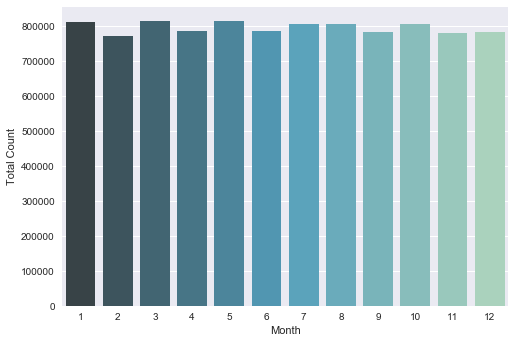

In [160]:
graph_1 = sns.barplot(x = 'MONTH', y = 'TOTAL_COUNT', data = df_month, palette = 'GnBu_d')
graph_1.set(xlabel = 'Month', ylabel = 'Total Count')

May is the most busiest month, whereas January is the least busiest month.

### 2) Weekly Traffic 

In [161]:
df_week = df_final[['WEEKDAY', 'TOTAL_COUNT']].groupby(['WEEKDAY'], sort = False).count().reset_index()

In [162]:
df_week.sort_values(by = 'TOTAL_COUNT', ascending = False)

,WEEKDAY,TOTAL_COUNT
6,Friday,1388894
2,Monday,1370471
3,Tuesday,1370085
5,Thursday,1367645
4,Wednesday,1367163
0,Saturday,1347383
1,Sunday,1345466


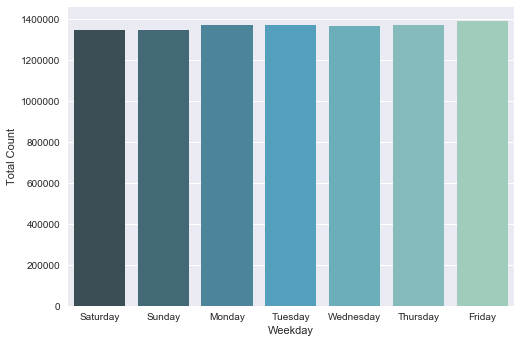

In [163]:
graph_2 = sns.barplot(x = 'WEEKDAY', y = 'TOTAL_COUNT', data = df_week, palette = 'GnBu_d')
graph_2.set(xlabel = 'Weekday', ylabel = 'Total Count')

Firday is the most busiest day, where as Sunday is the least busiest day. 

### 3) Hourly Traffic 

In [164]:
df_hour = df_final[['HOUR', 'TOTAL_COUNT']].groupby(['HOUR'], sort = False).count().reset_index()

In [166]:
df_hour.sort_values(by = 'TOTAL_COUNT', ascending = False)

,HOUR,TOTAL_COUNT
12,8,811709
15,12,781798
14,4,777618
16,16,777475
13,0,776747
17,20,776523
8,9,443517
9,13,421455
10,17,420964
11,21,420808


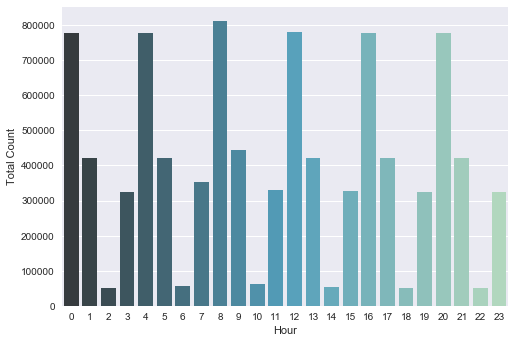

In [167]:
graph_3 = sns.barplot(x = 'HOUR', y = 'TOTAL_COUNT', data = df_hour, palette = 'GnBu_d')
graph_3.set(xlabel = 'Hour', ylabel = 'Total Count')

8 AM is the most busiest hour, where as 2 AM is the least busiest hour. 

### 4) Unit Count of Station 

In [168]:
df_units = df_final[['UNIT', 'STATION']].groupby(['STATION']).aggregate({'UNIT': pd.Series.nunique}).sort_values(by = 'UNIT', ascending = False).reset_index()

In [169]:
df_units.head()

,STATION,UNIT
0,23 ST,6
1,86 ST,5
2,CANAL ST,5
3,34 ST-PENN STA,4
4,42 ST-GRD CNTRL,4


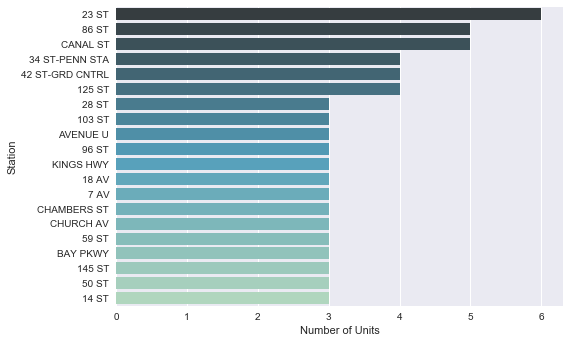

In [170]:
graph_4 = sns.barplot(x = 'UNIT', y = 'STATION', data = df_units.head(20), palette = 'GnBu_d')
graph_4.set(xlabel = 'Number of Units', ylabel = 'Station')

23 ST has the most number of units.

### 5) Busiest Division 

In [270]:
df_division = df_final[['DIVISION', 'TOTAL_COUNT']].groupby(['DIVISION'], sort = False).count().reset_index()

In [271]:
df_division.sort_values(by = 'TOTAL_COUNT', ascending = False)

,DIVISION,TOTAL_COUNT
3,IRT,3570950
1,IND,3220742
0,BMT,2115176
2,PTH,553904
4,SRT,74341
5,RIT,21994


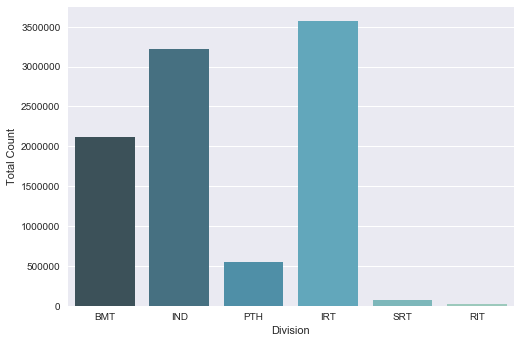

In [272]:
graph_5 = sns.barplot(x = 'DIVISION', y = 'TOTAL_COUNT', data = df_division, palette = 'GnBu_d')
graph_5.set(xlabel = 'Division', ylabel = 'Total Count')

IRT (Interborough Rapid Transit) is the most busiest division, where as RIT (Roosevelt Island Tram) is the least busiest division.

### 6) Busiest Station 

In [269]:
df_station = df_final[['TOTAL_COUNT', 'STATION']].groupby(['STATION']).aggregate({'TOTAL_COUNT': pd.Series.nunique}).sort_values(by = 'TOTAL_COUNT', ascending = False).reset_index()

In [172]:
df_station.head()

,STATION,TOTAL_COUNT
0,34 ST-PENN STA,202395
1,FULTON ST,168982
2,23 ST,137885
3,34 ST-HERALD SQ,117942
4,CANAL ST,117018


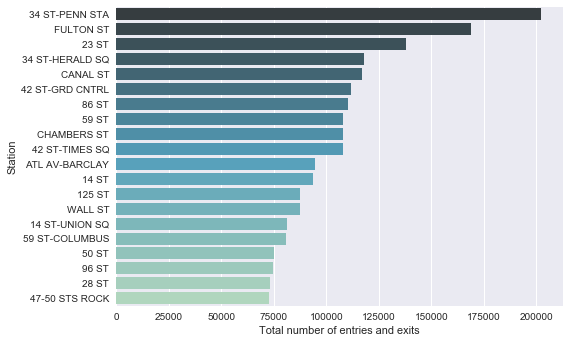

In [273]:
graph_6 = sns.barplot(x = 'TOTAL_COUNT', y = 'STATION', data = df_station.head(20), palette = 'GnBu_d')
graph_6.set(xlabel = 'Total number of entries and exits', ylabel = 'Station')

34 ST-PENN STA is the most busiest station.

### 7) Busiest Station Count - Monthly 

In [240]:
df_traffic_month = df_final[['MONTH', 'TOTAL_COUNT','STATION']].groupby(['STATION','MONTH']).count().sort_values(by = 'TOTAL_COUNT', ascending = False).reset_index()

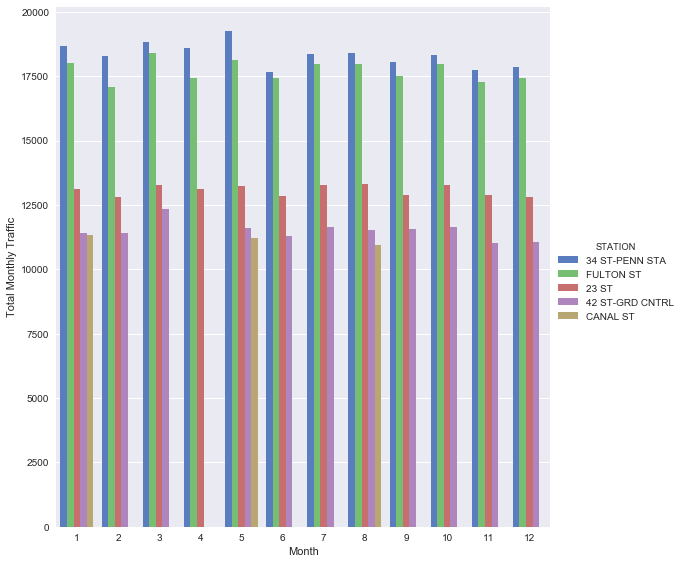

In [274]:
graph_7 = sns.factorplot(x = 'MONTH', y = 'TOTAL_COUNT', hue = 'STATION', data = df_traffic_month.head(50), size = 8, kind = 'bar', palette = 'muted')
graph_7.set(xlabel = 'Month', ylabel = 'Total Monthly Traffic')

### 8) Busiest Station Count - Weekly  

In [245]:
df_traffic_week = df_final[['WEEKDAY', 'TOTAL_COUNT','STATION']].groupby(['STATION','WEEKDAY']).count().sort_values(by = 'TOTAL_COUNT', ascending = False).reset_index()

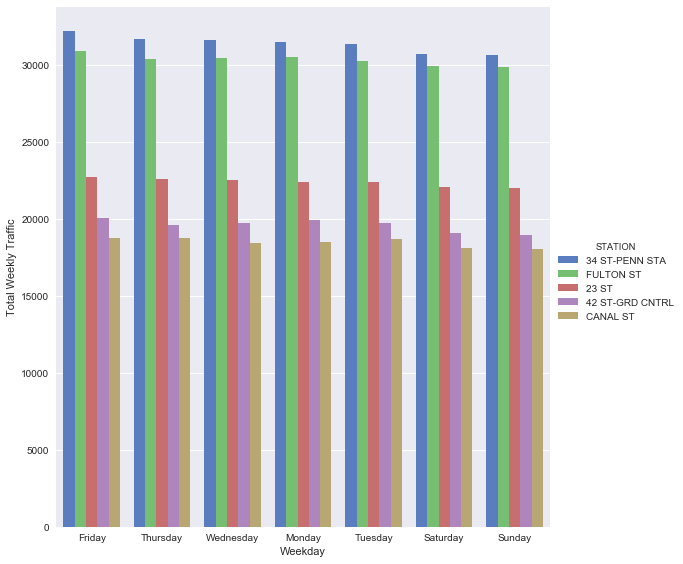

In [275]:
graph_8 = sns.factorplot(x = 'WEEKDAY', y = 'TOTAL_COUNT', hue = 'STATION', data = df_traffic_week.head(35), size = 8, kind = 'bar', palette = 'muted')
graph_8.set(xlabel = 'Weekday', ylabel = 'Total Weekly Traffic')

### 9) Busiest Date

In [265]:
df_date = df_final[['TOTAL_COUNT','DATE']].groupby(['DATE']).count().sort_values(by =['TOTAL_COUNT'], ascending = False).reset_index()

##### Most Busiest Date 

In [266]:
df_date.head()

,DATE,TOTAL_COUNT
0,02/19/2016,33094
1,12/14/2016,29681
2,02/25/2016,29116
3,11/06/2016,28200
4,01/05/2016,27916


##### Least Busiest Date 

In [267]:
df_date.tail()

,DATE,TOTAL_COUNT
360,08/19/2016,25666
361,03/25/2016,25661
362,01/01/2016,25607
363,05/20/2016,25348
364,03/13/2016,23494
